170498071/170498071 [==============================] - 63s 0us/step
Epoch 1/10
625/625 [==============================] - 45s 69ms/step - loss: 1.6183 - accuracy: 0.4072 - val_loss: 1.3588 - val_accuracy: 0.5115
Epoch 2/10
625/625 [==============================] - 44s 70ms/step - loss: 1.2415 - accuracy: 0.5575 - val_loss: 1.1823 - val_accuracy: 0.5834
Epoch 3/10
625/625 [==============================] - 44s 70ms/step - loss: 1.0856 - accuracy: 0.6181 - val_loss: 1.0569 - val_accuracy: 0.6284
Epoch 4/10
625/625 [==============================] - 43s 69ms/step - loss: 0.9777 - accuracy: 0.6563 - val_loss: 1.0608 - val_accuracy: 0.6317
Epoch 5/10
625/625 [==============================] - 47s 75ms/step - loss: 0.8956 - accuracy: 0.6832 - val_loss: 0.9253 - val_accuracy: 0.6746
Epoch 6/10
625/625 [==============================] - 52s 84ms/step - loss: 0.8288 - accuracy: 0.7104 - val_loss: 0.9036 - val_accuracy: 0.6855
Epoch 7/10
625/625 [==============================] - 52s 83ms/step 

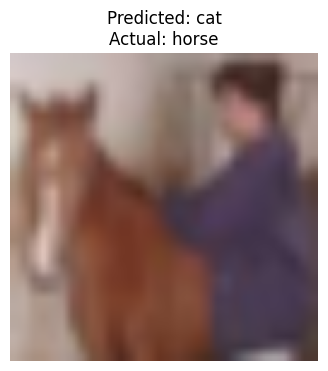

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
'dog', 'frog', 'horse', 'ship', 'truck']

index = int(input("Enter an index (0 to 9999) for test image: "))
if index < 0 or index >= len(x_test):

    print("Invalid index. Using index 0 by default.")
    index = 0

test_image = x_test[index]
true_label = np.argmax(y_test[index])

prediction = model.predict(np.expand_dims(test_image, axis=0))
predicted_label = np.argmax(prediction)

plt.figure(figsize=(4, 4))
resized_image = tf.image.resize(test_image, [128, 128])
plt.imshow(resized_image)
plt.axis('off')
plt.title(f"Predicted: {class_names[predicted_label]}\nActual: {class_names[true_label]}")
plt.show()